## 1 - Building basic functions with numpy ##

Numpy is the main package for scientific computing in Python. It is maintained by a large community (www.numpy.org). In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. You will need to know how to use these functions for future assignments.

### 1.1 - sigmoid function, np.exp() ###

Before using np.exp(), you will use math.exp() to implement the sigmoid function. You will then see why np.exp() is preferable to math.exp().

**Exercise**: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="Sigmoid.png" style="width:500px;height:228px;">

To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

In [1]:
import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + math.exp(-x))
    ### END CODE HERE ###
    
    return s

In [2]:
basic_sigmoid(3)

0.9525741268224334

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** basic_sigmoid(3) **</td> 
        <td>0.9525741268224334 </td> 
    </tr>

</table>

Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful. 

In [3]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

TypeError: bad operand type for unary -: 'list'

In fact, if $ x = (x_1, x_2, ..., x_n)$ is a row vector then $np.exp(x)$ will apply the exponential function to every element of x. The output will thus be: $np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$

In [4]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

[ 2.71828183  7.3890561  20.08553692]


Furthermore, if x is a vector, then a Python operation such as $s = x + 3$ or $s = \frac{1}{x}$ will output s as a vector of the same size as x.

# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html). 

You can also create a new cell in the notebook and write `np.exp?` (for example) to get quick access to the documentation.

**Exercise**: Implement the sigmoid function using numpy. 

**Instructions**: x could now be either a real number, a vector, or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices...) are called numpy arrays. You don't need to know more for now.
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [5]:
import numpy as np # this means you can access numpy functions by writing np.function() instead of numpy.function()

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-x))
    ### END CODE HERE ###
    
    return s

In [6]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

**Expected Output**: 
<table>
    <tr> 
        <td> **sigmoid([1,2,3])**</td> 
        <td> array([ 0.73105858,  0.88079708,  0.95257413]) </td> 
    </tr>
</table> 


### 1.2 - Sigmoid gradient

As you've seen in lecture, you will need to compute gradients to optimize loss functions using backpropagation. Let's code your first gradient function.

**Exercise**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [7]:
def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    s = 1 / (1 + np.exp(-x))
    ds = s * (1 - s)
    ### END CODE HERE ###
    
    return ds

In [8]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


**Expected Output**: 


<table>
    <tr> 
        <td> **sigmoid_derivative([1,2,3])**</td> 
        <td> [ 0.19661193  0.10499359  0.04517666] </td> 
    </tr>
</table> 



### 1.3 - Reshaping arrays ###

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

<img src="image2vector.png" style="width:500px;height:300;">

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [9]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    v = image.reshape((image.shape[0] * image.shape[1] * image.shape[2], 1))
    ### END CODE HERE ###
    
    return v

In [10]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


**Expected Output**: 


<table style="width:100%">
     <tr> 
       <td> **image2vector(image)** </td> 
       <td> [[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]</td> 
     </tr>
    
   
</table>

### 1.4 - Normalizing rows

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$ Note that you can divide matrices of different sizes and it works fine: this is called broadcasting and you're going to learn about it in part 5.


**Exercise**: Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [11]:
def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)
        
    # Divide x by its norm.
    x = x / x_norm
    ### END CODE HERE ###

    return x

In [12]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


**Expected Output**: 

<table style="width:60%">
    <tr> 
        <td> **normalizeRows(x)** </td>
        <td> [[ 0.          0.6         0.8]
 [ 0.13736056  0.82416338  0.54944226]]</td> 
    </tr>
</table>

### 1.5 Implement Logistic Regression

1. Define a **log_reg function** with arguments X, y and alpha (features, target and the learning rate of the gradient descent):

- this function should implement the **gradient descent** based on X and y and the logistic cost function that you will specify. 

*Remember that through forward and backward propagation of the computational graph, the gradient descent should update the weights of the model. You can implement this either by loops or by vectorization (during the next class we will cover the vectorized implementation of this).

2. Define a **RandomGridSearch** function that takes as input arguments the estimator (an example could be log_reg()), the number of cross validation folds, and the possible values of the hyperparameters, in this case it is the learning_rate of the gradient descent in a list format (example alpha_grid = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]). 

- the final form could be as follows: 
    RandomGridSearch(log_reg(), X, y, alpha, cv = 3, alpha_grid = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]).
    
- this function should randomly select several hyperparameter values from alpha_grid and perform cross validations for each of those values. For each alpha_grid value this function should get a list of cross validation scores. 
- use **ROC AUC score** as a score metric, you can find roc_auc_score function in scikit learn's metrics module useful for this task. 

*Note that the number of scores will depend on the value of "cv" you specify in the function. At the end, this function should return the best hyperparameter value based on the best average cross validation score.
Using this hyperparameter value you can train your final model on the whole training set by using log_reg function with X, y, and alpha = best hyperparameter from RandomGridSearch.

3. Using all of your defined functions train a logistic regression model on **Santander Customer Satisfaction** problem that you can find on Kaggle. 
- You can take several features of your choice from the dataset for training the model (for example up to 5-7 features). The target is binary. 
- Be careful with the target, **if it is imbalanced** you can use oversampling, undersampling, class weighting in cost function or any other method of dealing with the imbalanced target that you may find useful (you can do your research here). 
- After training the model, report the main performance metrics of your model: **ROC AUC score, precision and recall, F1 score**, as well as the **ROC curve and confusion matrix**.
- Write a short description about the trained model and its performance in a way you see it. Describe the features you have used, which of them are the most important in terms of predicting the target and interpret in your words the performance metrics of the model. Use 5-7 sentences in maximum.

*Note: You are free to use your preferred coding design with your preferred data structures for this assignment. The most important thing is to get the correct results. We will check it in the future by using the scikit learns logistic function.

In [13]:
class MyLogisticRegression():
    def __init__(self):
        pass
        
    def fit(self, X, y, alpha, n_iter):
        self.alpha = alpha
        self.n_iter = n_iter
        
        r = np.random.RandomState(1)
        self.w_ = r.normal(loc = 0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.activation(self.net_input(X))
            error = y - output
            
            self.w_[1:] += self.alpha * X.T.dot(error)
            self.w_[0] += self.alpha * error.sum()
            
#             self.cost_.append(self.cost(y, output))
    
    def net_input(self, X):
        return self.w_[0] + X.dot(self.w_[1:])
    
    def activation(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) > 0, 1, 0)

    def cost(self, y, y_pred):
        return -y.dot(np.log(y_pred)) - ((1 - y).dot(np.log(1 - y_pred)))

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


class RandomGridSearch:
    def __init__(self, classifier, cv, alpha_grid, n_iter):
        self.classifier = classifier
        self.cv = cv
        self.alpha_grid = alpha_grid
        self.n_iter = n_iter


    def fit(self, X, y):
        
        for alpha in self.alpha_grid:
            skfolds = StratifiedKFold(n_splits=self.cv, random_state=1, shuffle = True)
            
            y_pred = np.empty(y.shape)
            y_pred_decision = np.empty(y.shape)
            
            for train_index, test_index in skfolds.split(X, y):
                X_train_fold = X[train_index]
                y_train_fold = y[train_index]
                
                X_test_fold = X[test_index]
                y_test_fold = y[test_index]
                
                self.classifier.fit(X = X_train_fold, 
                                    y = y_train_fold,
                                    alpha  = alpha,
                                    n_iter = self.n_iter)
                
                # the predicted classes: thresholded values
                y_pred_fold = self.classifier.predict(X_test_fold)
                
                # decisions: non thresholded values
                y_pred_fold_decision = self.classifier.activation(self.classifier.net_input(X_test_fold))
                                
                y_pred[test_index] = y_pred_fold
                y_pred_decision[test_index] = y_pred_fold_decision
            
            # reporting the results
            self.report_results(y, y_pred, y_pred_decision, alpha)
            
        
    def report_results(self, y, y_pred, y_pred_decision, alpha):
        print("Results for model trained with learning rate: ", alpha)

        print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
        print("Precission score: ", precision_score(y, y_pred))
        print("    Recall score: ", recall_score(y, y_pred))
        print("        F1 score: ", f1_score(y, y_pred))
        print("   ROC AUC score: ", roc_auc_score(y, y_pred))
#         print("      Total Cost: ", self.classifier.cost(y, y_pred_decision))
        
        print("----------------------------------------------\n\n")
        

### testing on iris dataset

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# get only 2 classes (0 and 1) since we are going to do binary classification
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

X_test_01_subset = X_test[(y_test == 0) | (y_test == 1)]
y_test_01_subset = y_test[(y_test == 0) | (y_test == 1)]

In [16]:
lr = MyLogisticRegression()
grid_search = RandomGridSearch(lr, cv=3, alpha_grid = [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 5], n_iter = 50)
grid_search.fit(X_train_01_subset, y_train_01_subset)

Results for model trained with learning rate:  0.0001
Confusion Matrix:
 [[ 0 35]
 [ 0 35]]
Precission score:  0.5
    Recall score:  1.0
        F1 score:  0.6666666666666666
   ROC AUC score:  0.5
----------------------------------------------


Results for model trained with learning rate:  0.001
Confusion Matrix:
 [[ 0 35]
 [ 0 35]]
Precission score:  0.5
    Recall score:  1.0
        F1 score:  0.6666666666666666
   ROC AUC score:  0.5
----------------------------------------------


Results for model trained with learning rate:  0.01
Confusion Matrix:
 [[35  0]
 [ 0 35]]
Precission score:  1.0
    Recall score:  1.0
        F1 score:  1.0
   ROC AUC score:  1.0
----------------------------------------------


Results for model trained with learning rate:  0.05
Confusion Matrix:
 [[35  0]
 [ 0 35]]
Precission score:  1.0
    Recall score:  1.0
        F1 score:  1.0
   ROC AUC score:  1.0
----------------------------------------------


Results for model trained with learning rat

starting from alpha = 0.1 the divergence process starts in gradient descent algorithm
so, we will pick alpha = 0.05 as the best hyperparameter and go ahead by training on the whole dataset with this alpha

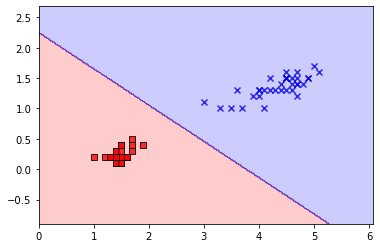

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z,  alpha = 0.2, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

lr = MyLogisticRegression()
lr.fit(X_train_01_subset, y_train_01_subset, alpha = 0.05, n_iter = 50)

plot_decision_regions(X_train_01_subset, y_train_01_subset, lr)


### testing on Santander Customer Satisfaction problem

In [18]:
import pandas as pd

data = pd.read_csv("data\\train.csv")

In [19]:
data.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [20]:
from sklearn.preprocessing import StandardScaler

X_train = data[data.columns[1:-2]].values
y_train = data["TARGET"].values

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)

In [21]:
lr1 = MyLogisticRegression()
grid_search = RandomGridSearch(lr1, cv=3, alpha_grid = [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 5], n_iter = 100)
grid_search.fit(X_train_std, y_train)

Results for model trained with learning rate:  0.0001
Confusion Matrix:
 [[72745   267]
 [ 2964    44]]
Precission score:  0.1414790996784566
    Recall score:  0.014627659574468085
        F1 score:  0.026514010244049414
   ROC AUC score:  0.5054853632337908
----------------------------------------------


Results for model trained with learning rate:  0.001
Confusion Matrix:
 [[70369  2643]
 [ 2494   514]]
Precission score:  0.16281279695913842
    Recall score:  0.17087765957446807
        F1 score:  0.16674776966747767
   ROC AUC score:  0.5673390653649473
----------------------------------------------


Results for model trained with learning rate:  0.01
Confusion Matrix:
 [[71564  1448]
 [ 2871   137]]
Precission score:  0.08643533123028391
    Recall score:  0.045545212765957445
        F1 score:  0.05965599825821904
   ROC AUC score:  0.5128564282204848
----------------------------------------------


Results for model trained with learning rate:  0.05
Confusion Matrix:
 [[6704

### testing scikit learn LogisticRegression and RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# forest_clf = LogisticRegression(random_state=42)

# y_probas = cross_val_predict(forest_clf, X_train_std, y_train, cv=3,method="predict_proba")
# y_scores = y_probas[:, 1]

# fpr, tpr, thresholds = roc_curve(y_train,y_scores)

# plt.plot(fpr, tpr, "b:", label="SGD")


In [46]:
lr2 = LogisticRegression(random_state=42)
# lr2 = RandomForestClassifier(random_state=42)

X_tr, X_t, y_tr, y_t = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train)

lr2.fit(X = X_tr, y = y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'ROC curves on training data vs test data')

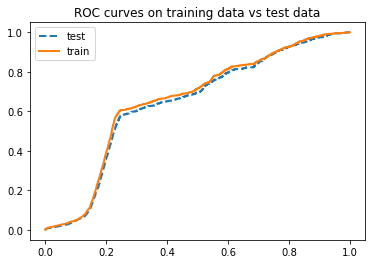

In [47]:
train_scores = lr2.decision_function(X_tr)
# train_scores = lr2.predict_proba(X_tr)[:, 1]
fpr, tpr, thresholds = roc_curve(y_tr, train_scores)


test_scores = lr2.decision_function(X_t)
# test_scores = lr2.predict_proba(X_t)[:, 1]
fpr_t, tpr_t, thresholds = roc_curve(y_t, test_scores)


plt.plot(fpr_t, tpr_t, linewidth=2, linestyle='--', label = "test")
plt.plot(fpr, tpr, linewidth=2, label = "train")
plt.legend()
plt.title("ROC curves on training data vs test data")

In [48]:
print("RUC score on train data: ", roc_auc_score(y_tr, train_scores))
print("RUC score on test  data: ", roc_auc_score(y_t, test_scores))

RUC score on train data:  0.6546982913712845
RUC score on test  data:  0.6409969617472091


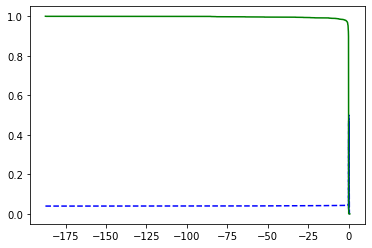

In [49]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_tr, train_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

The results show that the model underfits, i.e the model is too simple for the Santander dataset. Scikit's LogisticRegression shows ROC AUC = 0.64 accuracy, whereas our implementation shows ROC AUC = 0.55 accuracy on test data (the ROC AUC scores are approximetly the same for train and test data, which means that the model underfits).

The RandomForestClassifier performs better: ROC AUC on train = 0.96,  ROC AUC on test = 0.76.